# Green AI Project

## Getting the AirParif data

In [71]:
import dataRetriever as dr
import pandas as pd
import quickPlotter as qp
import airparifDataPrep
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
hourly_df, daily_df, monthly_df = airparifDataPrep.getAirparifData("data")
df_noNa = monthly_df.copy(deep=True)
df_noNa.drop("PM25", axis=1, inplace=True)

## Analysis

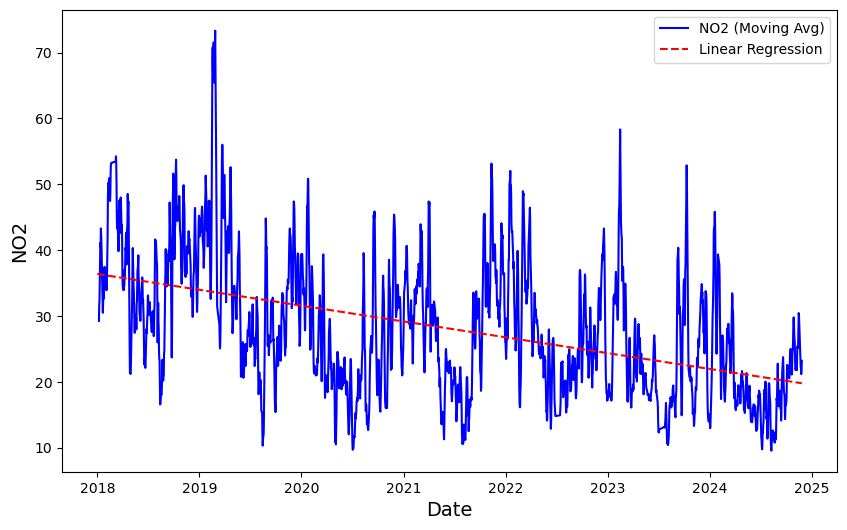

In [17]:
plot = qp.quickRegPlot(daily_df, "date", "NO2", True, 7)

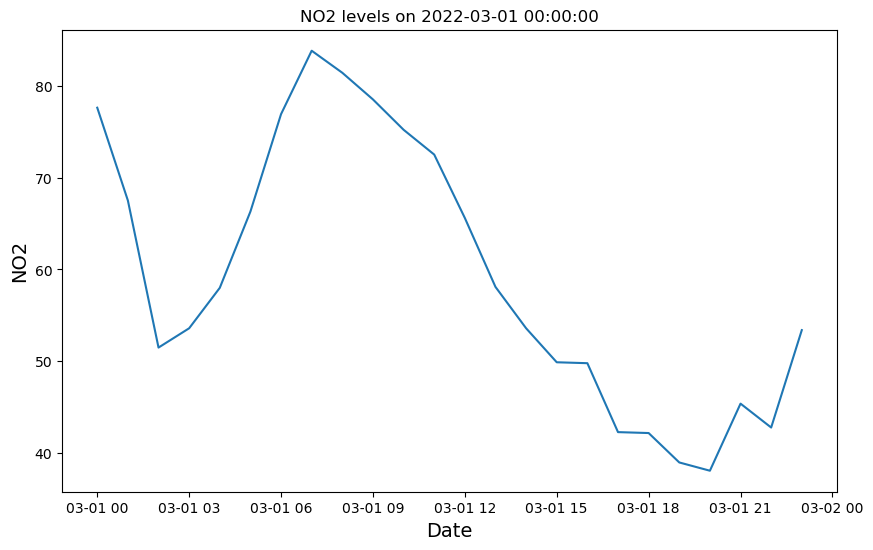

In [20]:
qp.pollutantLevelsOnDay("2022-03-01", "NO2", hourly_df)

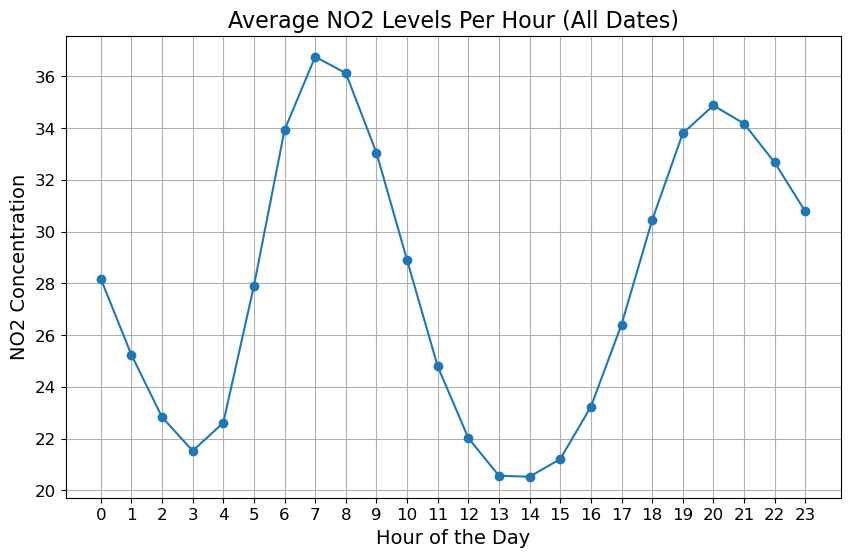

In [21]:
qp.avgPollutantLevelPerHour("NO2", hourly_df)

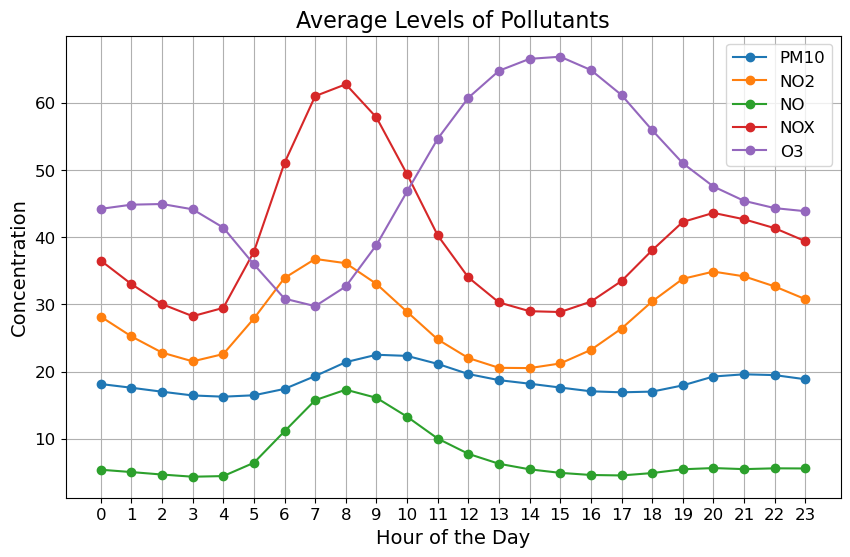

In [22]:
qp.avgAllPolutantsPerHour(hourly_df)

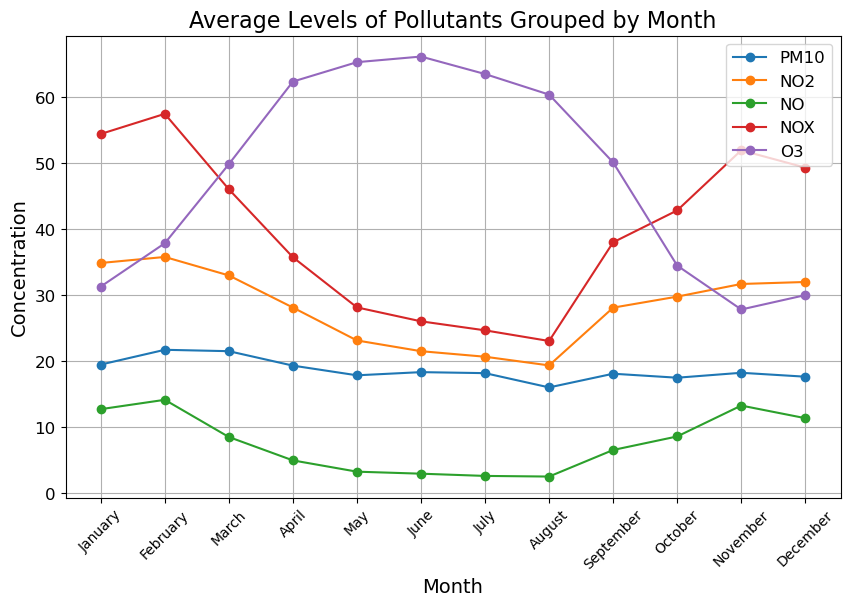

In [23]:
qp.avgAllPolutantsPerMonth(daily_df)

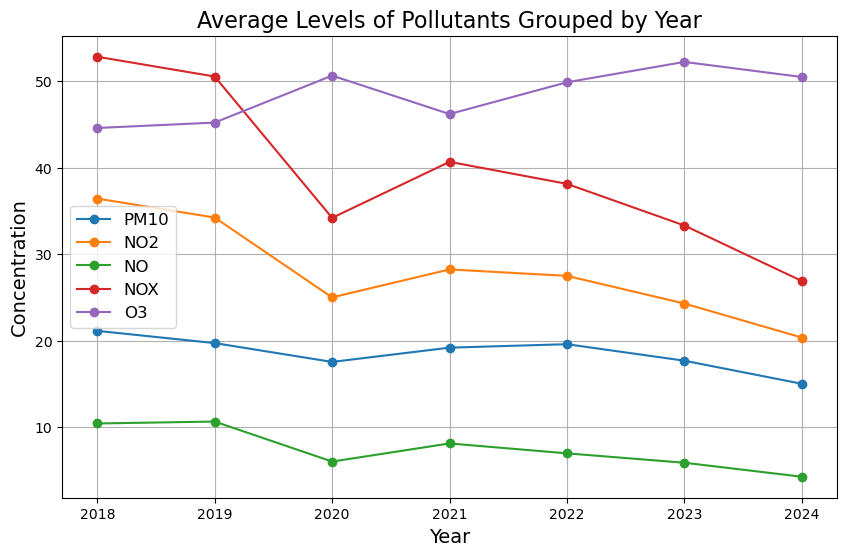

In [24]:
qp.avgAllPolutantsPerYear(daily_df)

          PM10       NO2        NO       NOX        O3
PM10  1.000000  0.668713  0.649251  0.709408  0.229389
NO2   0.668713  1.000000  0.703704  0.887967  0.532201
NO    0.649251  0.703704  1.000000  0.951585  0.538690
NOX   0.709408  0.887967  0.951585  1.000000  0.577860
O3    0.229389  0.532201  0.538690  0.577860  1.000000


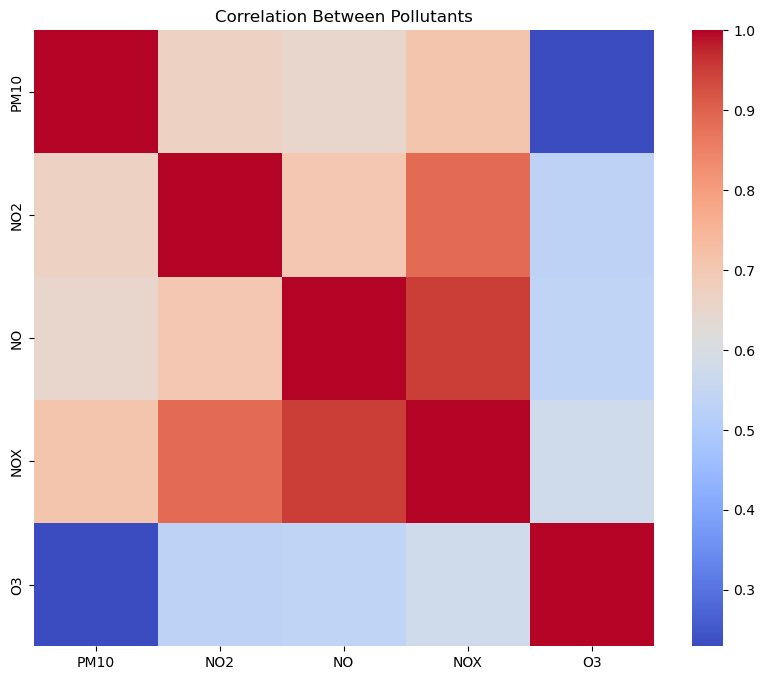

In [25]:
correlation_matrix = daily_df[["PM10", "NO2", "NO", "NOX", "O3"]].corr()
correlation_matrix = abs(correlation_matrix)
print(correlation_matrix)

import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Between Pollutants")
plt.show()

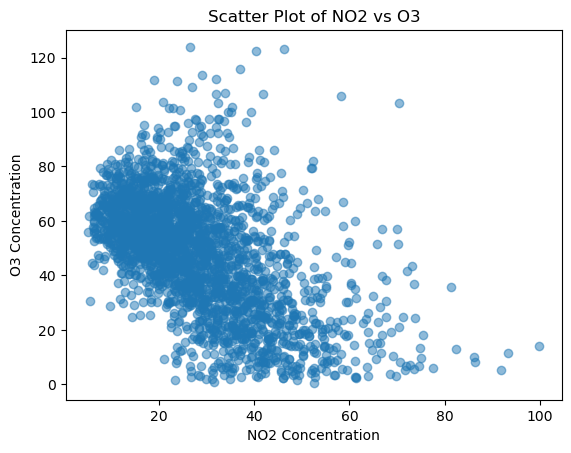

In [26]:
plt.scatter(daily_df['NO2'], daily_df['O3'], alpha=0.5)
plt.xlabel('NO2 Concentration')
plt.ylabel('O3 Concentration')
plt.title('Scatter Plot of NO2 vs O3')
plt.show()

In [73]:
train = df_noNa[:-6]
test = df_noNa[-6:]

c:\Users\hbonn\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\hbonn\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\hbonn\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\hbonn\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\hbonn\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximu

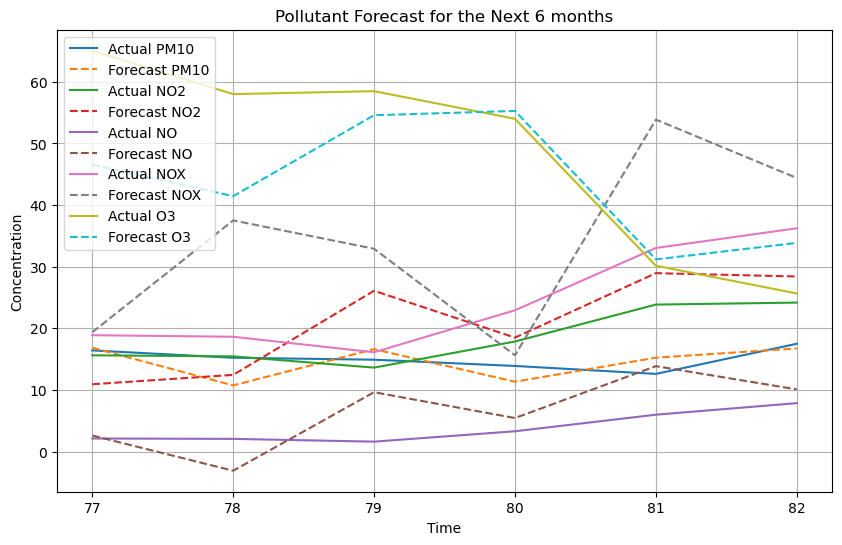

In [70]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Function to forecast a single pollutant
def forecast_arima(pollutant_series, steps=6):
    model = ARIMA(pollutant_series, order=(50, 1, 10))  # Adjust the parameters if needed
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)  # Forecast the next 'steps' periods
    return forecast

# Forecast for each pollutant
forecast_pm10 = forecast_arima(train['PM10'])
forecast_no2 = forecast_arima(train['NO2'])
forecast_no = forecast_arima(train['NO'])
forecast_nox = forecast_arima(train['NOX'])
forecast_o3 = forecast_arima(train['O3'])

# Plot the forecast
plt.figure(figsize=(10, 6))

plt.plot(test.index, test['PM10'], label='Actual PM10')
plt.plot(test.index, forecast_pm10, label='Forecast PM10', linestyle='--')

plt.plot(test.index, test['NO2'], label='Actual NO2')
plt.plot(test.index, forecast_no2, label='Forecast NO2', linestyle='--')

plt.plot(test.index, test['NO'], label='Actual NO')
plt.plot(test.index, forecast_no, label='Forecast NO', linestyle='--')

plt.plot(test.index, test['NOX'], label='Actual NOX')
plt.plot(test.index, forecast_nox, label='Forecast NOX', linestyle='--')

plt.plot(test.index, test['O3'], label='Actual O3')
plt.plot(test.index, forecast_o3, label='Forecast O3', linestyle='--')

plt.legend()
plt.title('Pollutant Forecast for the Next 6 months')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.grid(True)
plt.show()

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE and RMSE for each pollutant
mae_pm10 = mean_absolute_error(test['PM10'], forecast_pm10)
rmse_pm10 = np.sqrt(mean_squared_error(test['PM10'], forecast_pm10))

mae_no2 = mean_absolute_error(test['NO2'], forecast_no2)
rmse_no2 = np.sqrt(mean_squared_error(test['NO2'], forecast_no2))

mae_no = mean_absolute_error(test['NO'], forecast_no)
rmse_no = np.sqrt(mean_squared_error(test['NO'], forecast_no))

mae_nox = mean_absolute_error(test['NOX'], forecast_nox)
rmse_nox = np.sqrt(mean_squared_error(test['NOX'], forecast_nox))

mae_o3 = mean_absolute_error(test['O3'], forecast_o3)
rmse_o3 = np.sqrt(mean_squared_error(test['O3'], forecast_o3))

print(f"MAE PM10: {mae_pm10}, RMSE PM10: {rmse_pm10}")
print(f"MAE NO2: {mae_no2}, RMSE NO2: {rmse_no2}")
print(f"MAE NO: {mae_no}, RMSE NO: {rmse_no}")
print(f"MAE NOX: {mae_nox}, RMSE NOX: {rmse_nox}")
print(f"MAE O3: {mae_o3}, RMSE O3: {rmse_o3}")


MAE PM10: 2.0960320521817946, RMSE PM10: 2.4926335074243
MAE NO2: 5.02147226508936, RMSE NO2: 6.201706593266168
MAE NO: 4.319973495293339, RMSE NO: 5.2099657531469825
MAE NOX: 12.07208425134821, RMSE NOX: 14.097081480641974
MAE O3: 8.241081965176528, RMSE O3: 10.805957120861175
